# An Exploration of US Flight Data, 2005-2008
## by Matthew Savas

## Preliminary Wrangling

This data is taken from the [US Bureau of Transportation of Statistics](https://www.transtats.bts.gov/Fields.asp?Table_ID=236). I have merged the 4 most recent years of data, 2005-2008, into a single dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load multiple datasets
df_05 = pd.read_csv('2005.csv')
df_06 = pd.read_csv('2006.csv')
df_07 = pd.read_csv('2007.csv')
df_08 = pd.read_csv('2008.csv')

In [3]:
# merge datasets into a single frame
frames = [df_05, df_06, df_07, df_08]
df = pd.concat(frames)

In [4]:
# check basic info of the dataset 
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28745461 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 6.4+ GB


(28745461, 29)

In [5]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4.0,23.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9.0,18.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.874546e+07,2.874546e+07,2.874546e+07,2.874546e+07,2.819280e+07,2.874546e+07,2.813001e+07,2.874546e+07,2.874546e+07,2.812696e+07,...,2.874546e+07,2.859381e+07,2.860840e+07,2.874546e+07,2.874546e+07,2.326047e+07,2.326047e+07,2.326047e+07,2.326047e+07,2.326047e+07
mean,2.006499e+03,6.484321e+00,1.572595e+01,3.938134e+00,1.339519e+03,1.331739e+03,1.485413e+03,1.496446e+03,2.160443e+03,1.261049e+02,...,7.244232e+02,7.043702e+00,1.598196e+01,1.926725e-02,2.249329e-03,4.236967e+00,8.572914e-01,4.472359e+00,2.810081e-02,5.506278e+00
std,1.111091e+00,3.417658e+00,8.787606e+00,1.990655e+00,4.778368e+02,4.639745e+02,5.034113e+02,4.808414e+02,1.943519e+03,7.088660e+01,...,5.675240e+02,2.711206e+01,1.131661e+01,1.374628e-01,4.737372e-02,2.140553e+01,9.915769e+00,1.744351e+01,1.192442e+00,2.184749e+01
min,2.005000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.600000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.900000e+01,0.000000e+00,0.000000e+00
25%,2.006000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.109000e+03,1.115000e+03,5.940000e+02,7.500000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.325000e+03,1.515000e+03,1.520000e+03,1.503000e+03,1.080000e+02,...,5.700000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.007000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.911000e+03,1.908000e+03,3.415000e+03,1.560000e+02,...,9.510000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.743000e+03,1.879000e+03,...,4.962000e+03,1.523000e+03,1.339000e+03,1.000000e+00,1.000000e+00,2.580000e+03,1.510000e+03,1.392000e+03,3.920000e+02,1.366000e+03


### What is the structure of your dataset?

The dataset comprises 4 years of flight data from 2005-2008. There are 28745461 flights captured across 29 variables. 

### What is/are the main feature(s) of interest in your dataset?

I am most interested to learn about: 
* The busiest airlines and airports
* The best and worst performing carriers and airports

I frequently travel for work, so this is valuable information!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The dataset is already well organized to answer these questions. I will leverage the carrier codes and airport codes to investigate performance. Delta is frequently cited as a top carrier in the US - and my preferred airline - so I suspect this airline will perform especially well.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Which carriers have the most flights?

Text(0.5, 1.0, 'Number of Flights by Carrier')

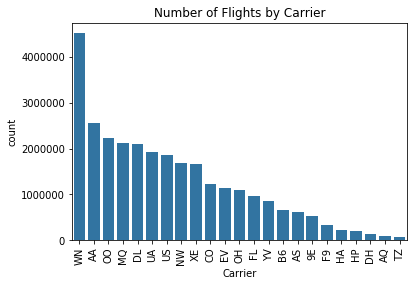

In [7]:
# Set the order by most flights to least flights
carrier_order = df['UniqueCarrier'].value_counts().index

# Remove color because this is a univariate exploration
base_color = sb.color_palette()[0]

# Plot
sb.countplot(data=df, x='UniqueCarrier', color=base_color, order=carrier_order)
plt.xticks(rotation = 90)
plt.xlabel('Carrier')
plt.title('Number of Flights by Carrier')

In [8]:
southwest = df[df['UniqueCarrier'] == 'WN']
american = df[df['UniqueCarrier'] == 'AA']

In [9]:
southwest['UniqueCarrier'].count(),  american['UniqueCarrier'].count()
(southwest['UniqueCarrier'].count() - american['UniqueCarrier'].count()) / southwest['UniqueCarrier'].count()

0.43277422447503094

Southwest Airlines (code 'WN') has the most flights by far. In fact, they have flown 43% more flights than the second busiest airline, American Airlines (code 'AA'). This is somewhat misleading, however, as Enjoy Air (code MQ) is part of the American Airlines group.

Keeping with the __busy__ theme, let's find out which airports have the most flights.

### Which airports are the busiest?

Text(0.5, 1.0, 'Number of Flights by Origin Airport')

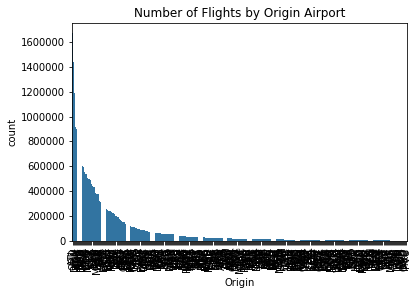

In [10]:
# Set the order by most flights to least flights
origin_order = df['Origin'].value_counts().index

# Remove color because this is a univariate exploration
base_color = sb.color_palette()[0]

# Plot
sb.countplot(data=df, x='Origin', color=base_color, order=origin_order)
plt.xticks(rotation = 90)
plt.xlabel('Origin')
plt.title('Number of Flights by Origin Airport')

There are way too many airports to plot something legible, so let's limit to the top 20.

Text(0.5, 1.0, 'Number of Flights by Origin Airport')

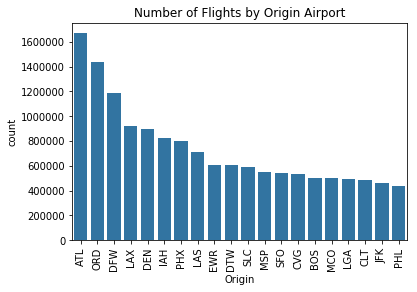

In [11]:
# Set the order by most flights to least flights and limit to top 20
origin_order_20 = df['Origin'].value_counts().nlargest(20).index

# Remove color because this is a univariate exploration
base_color = sb.color_palette()[0]

# Plot
sb.countplot(data=df, x='Origin', color=base_color, order=origin_order_20)
plt.xticks(rotation = 90)
plt.xlabel('Origin')
plt.title('Number of Flights by Origin Airport')

Now we can clearly see the busiest airports in the United States. It is no surprise that Atlanta and Chicago O'Hare are the busiest. I am surpried that Denver is so high. I have been considering a move there, but have been concerned about flight options due to my extensive travel for work. I guess I shouldn't be so worried! In fact, it's much busier than my home airport of Boston. 

### Which airlines are the worst performing by arrival delay?

In [12]:
# Create a dateframe that summarizes data by carrier
by_carrier = df.groupby(['UniqueCarrier'], as_index=False)

# Get average delay values by carrier
avg_delay = by_carrier['CarrierDelay'].mean().sort_values(by='CarrierDelay', ascending=False)

# Create a new dataframe for the plot
df_delay = pd.DataFrame(avg_delay)

Text(0.5, 0, 'Carrier')

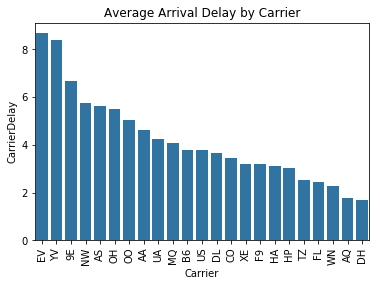

In [13]:
# Plot
base_color = sb.color_palette()[0]

sb.barplot(data=df_delay, x='UniqueCarrier', y='CarrierDelay', color=base_color)
plt.xticks(rotation=90)
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Carrier')


We can see that ExpressJet (code EV) is the worse performing airline. They may want to think about changing their name. Southwest Airlines has the best record of the major carriers. My preferred airline, Delta, has a respectable performance. Now let's check out delay by airport.

In [14]:
# Create a dateframe that summarizes data by airport
by_airport = df.groupby(['Origin'], as_index=False)

# Get average delay values by airport
avg_airport_delay = by_airport['DepDelay'].mean().sort_values(by='DepDelay', ascending=False)

# Create a new dataframe for the plot
df_airport_delay = pd.DataFrame(avg_airport_delay)

Text(0.5, 0, 'Airport')

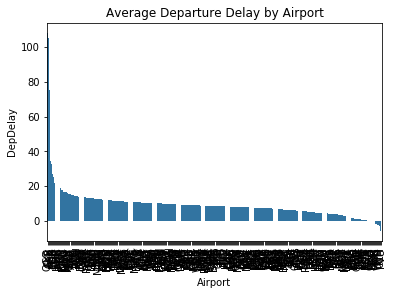

In [15]:
# Plot
base_color = sb.color_palette()[0]

sb.barplot(data=df_airport_delay, x='Origin', y='DepDelay', color=base_color)
plt.xticks(rotation=90)
plt.title('Average Departure Delay by Airport')
plt.xlabel('Airport')

Similar to the previous airport plot, there are just too many airports included for this to be legible. Let's limit again to the top 20 airports.

Text(0.5, 0, 'Airport')

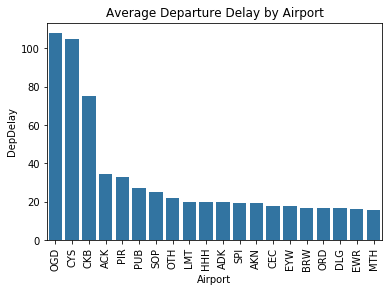

In [16]:
# Create a new dataframe for the plot that limits to the 20 worst airports
df_airport_delay_top_20 = pd.DataFrame(avg_airport_delay).nlargest(20, 'DepDelay')

# Plot
base_color = sb.color_palette()[0]

sb.barplot(data=df_airport_delay_top_20, x='Origin', y='DepDelay', color=base_color)
plt.xticks(rotation=90)
plt.title('Average Departure Delay by Airport')
plt.xlabel('Airport')

We can see that there are a few outliers: Ogden-Hinkley Airport, Cheyenne Regional Airport, North Central West Virgina Airport. These are by far the worst performing airports by departure delay. What about the best airports? 

Text(0.5, 0, 'Airport')

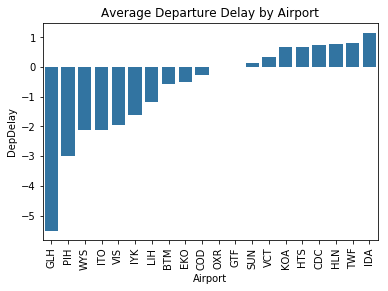

In [17]:
# Create a new dataframe for the plot that limits to the 20 best airports
df_airport_delay_top_20_best = pd.DataFrame(avg_airport_delay).nsmallest(20, 'DepDelay')

# Plot
base_color = sb.color_palette()[0]

sb.barplot(data=df_airport_delay_top_20_best, x='Origin', y='DepDelay', color=base_color)
plt.xticks(rotation=90)
plt.title('Average Departure Delay by Airport')
plt.xlabel('Airport')

How interesting! There are some airports that average an __early__ departure. I would not count that as better. On-time is what we are after. So the best performing airport with the lowest departure delay are Oxnard Airport and Great Falls International Airport with an average delay of 0 minutes.

# Plots
* Airport delay by type of delay
* Delay by code
* Seasonality - by destination
* Create delay severity by time delayed - bivariate 
* Bucket into Winter, Spring, Summer, Fall

## Bivariate Exploration

Let's see how things playout across busy and slow airports. First, let's define busy and slow airports. We'll use descriptive statistics to set four broad categories. 

In [18]:
airport_flights = df['Origin'].value_counts()
df_airport_flights = pd.DataFrame(airport_flights)

In [19]:
df_airport_flights.head()

,Origin
ATL,1670013
ORD,1437608
DFW,1187467
LAX,917857
DEN,897696


In [20]:
df_airport_flights.describe()

,Origin
count,3.210000e+02
mean,8.954972e+04
std,2.023321e+05
min,1.000000e+00
25%,4.208000e+03
50%,1.475600e+04
75%,5.954500e+04
max,1.670013e+06


In [21]:
# Define a function to populate a new column that define each airport across a category
def f(row):
    if float(row['Origin']) > 59545:
        val = 'Very Busy'
    elif float(row['Origin']) <= 59545 & row['Origin'] > 14756:
        val = 'Busy'
    elif float(row['Origin']) <= 14756 & row['Origin'] > 4208:
        val = 'Slow'
    else:
        val = 'Very Slow'
    return val

In [22]:
# Add the calculated string values to a new dataframe
df_airport_flights['AirportTraffic'] = df_airport_flights.apply(f, axis=1)

In [23]:
df_airport_flights.head()

,Origin,AirportTraffic
ATL,1670013,Very Busy
ORD,1437608,Very Busy
DFW,1187467,Very Busy
LAX,917857,Very Busy
DEN,897696,Very Busy


In [24]:
# Reset the index so I can merge the two dataframes on 'Origin'
df_airport_flights.reset_index(inplace=True)
df_airport_flights.head()

,index,Origin,AirportTraffic
0,ATL,1670013,Very Busy
1,ORD,1437608,Very Busy
2,DFW,1187467,Very Busy
3,LAX,917857,Very Busy
4,DEN,897696,Very Busy


In [25]:
# Rename columns
df_airport_flights.rename(columns={'index': 'Origin', 'Origin': 'TotalFlights'}, inplace=True)
df_airport_flights.head()

,Origin,TotalFlights,AirportTraffic
0,ATL,1670013,Very Busy
1,ORD,1437608,Very Busy
2,DFW,1187467,Very Busy
3,LAX,917857,Very Busy
4,DEN,897696,Very Busy


In [26]:
# Let's merge these dataframes so I can do an analysis that groups 
# airports by traffic volume

df_merge = df.merge(df_airport_flights, on='Origin', how='left')

In [27]:
df_merge.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalFlights,AirportTraffic
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,505291,Very Busy
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,505291,Very Busy
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,505291,Very Busy
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,505291,Very Busy
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,1437608,Very Busy


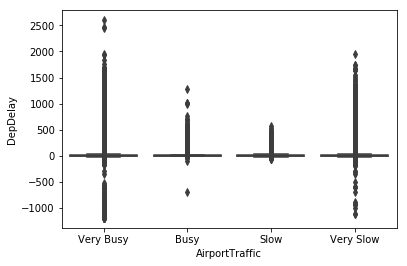

In [28]:
# Plot boxplot

traffic_classes = ['Very Busy', 'Busy', 'Slow', 'Very Slow']
tclasses = pd.api.types.CategoricalDtype(ordered=True, categories=traffic_classes)
df_merge['AirportTraffic'] = df_merge['AirportTraffic'].astype(tclasses); 
sb.boxplot(data=df_merge, x='AirportTraffic', y='DepDelay')


While this boxplot is hard to read because of so many outliers, it does clearly indicate that 'Slow' airports have the most stability when it comes to departure delays, while 'Very Busy' airports have the most volatility. Surprisingly, 'Very Slow' airports are also quite volatile. I would expect that fewer flights would make operations more simple - and therefore - successful, but that does not appear to be the case. 

Let's now get rid of the outliers.

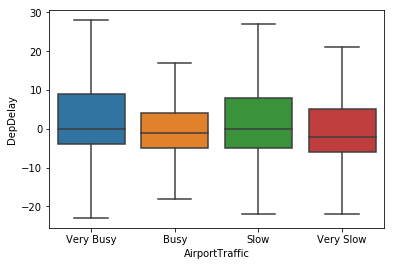

In [29]:
# Let's get rid of the outliers

traffic_classes = ['Very Busy', 'Busy', 'Slow', 'Very Slow']
tclasses = pd.api.types.CategoricalDtype(ordered=True, categories=traffic_classes)
df_merge['AirportTraffic'] = df_merge['AirportTraffic'].astype(tclasses); 
sb.boxplot(data=df_merge, x='AirportTraffic', y='DepDelay', showfliers=False)

It is now clear that the mean departure delay is nearly identical across all types of airports. However, different from the previous plot, 'Busy' airports appear to have the most stability. 

Now let's take a look at cancellations and their cause at the busiest airports.

In [30]:
# Which airports have the most cancellations?
total_cancellations = by_airport['Cancelled'].sum()
most_cancellations = total_cancellations.nlargest(10, columns='Cancelled')

Text(0.5, 0, 'Airport')

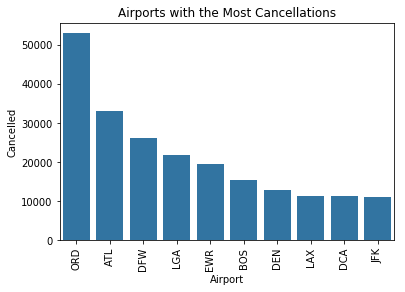

In [31]:
# Plot

base_color = sb.color_palette()[0]

sb.barplot(data=most_cancellations, x='Origin', y='Cancelled', color=base_color)
plt.xticks(rotation=90)
plt.title('Airports with the Most Cancellations')
plt.xlabel('Airport')

We can see that ORD is NOT an airport you would ever want to fly through with the largest number of cancellations by FAR! Yikes.... Again, my home airport of Boston is worse than Denver, so I shouldn't worry about moving there!

Now let's look at the cancellations by code to see what causes them.

In [32]:
# Capture the worse ten airports
worst_ten = ['ORD', 'ATL', 'DFW', 'LGA', 'EWR', 'BOS', 'DEN', 'LAX', 'DCA', 'JFK']

In [33]:
# Get the reason for cancellation by code across the worst ten airports

ccode = df_merge.groupby(['Origin', 'CancellationCode']).size()
ccode = ccode.reset_index(name='count')
ccode_worst_ten = ccode[ccode.Origin.isin(worst_ten)]
ccode_worst_ten

,Origin,CancellationCode,count
60,ATL,A,14200
61,ATL,B,11682
62,ATL,C,7181
63,ATL,D,23
122,BOS,A,6239
123,BOS,B,6270
124,BOS,C,3075
125,BOS,D,4
262,DCA,A,4914
263,DCA,B,4049


/Users/Matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Airport')

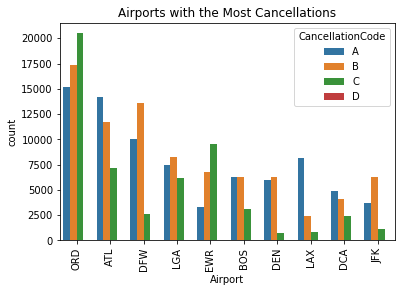

In [34]:
# Plot

airport_order = pd.api.types.CategoricalDtype(ordered=True, categories=worst_ten)
ccode_worst_ten['Origin'] = ccode_worst_ten['Origin'].astype(airport_order); 

sb.barplot(data=ccode_worst_ten, x='Origin', y='count', hue='CancellationCode')
plt.xticks(rotation=90)
plt.title('Airports with the Most Cancellations')
plt.xlabel('Airport')

Cancellation codes are: 
* A = carrier
* B = weather
* C = NAS (National Aviation System Delay)
* D = Security

We can clearly see that ORD suffered from NAS delays, which is weather that can slow down the system but shouldn't necessarily cause cancellation ([see reference](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations))

Security is not a really a factor for delays.

## Multivariate Exploration
Now let's look at a multivariate analysis of airport and carrier performance. Let's start with cancellations.te Exploration




In [64]:
# Let's limit the number of carriers to the number of airports we will analyze - the top 20 busiest
twenty_carriers = df_merge.UniqueCarrier.value_counts().nlargest(20)
twenty_carriers

WN    4505980
AA    2555908
OO    2230604
MQ    2113307
DL    2092208
UA    1925443
US    1869489
NW    1675890
XE    1654520
CO    1227656
EV    1144599
OH    1090830
FL     957880
YV     854056
B6     654323
AS     628791
9E     521059
F9     336958
HA     218357
HP     197853
Name: UniqueCarrier, dtype: int64

In [66]:
# capture these carriers in a list
twenty_carriers = ['WA', 'AA', 'OO', 'MQ', 'DL', 'UA', 'US', 'NW', 'XE', 'CO', 'EV', 'OH', 'FL', 'YV',
                  'B6', 'AS', '9E', 'F9', 'HA', 'HP']

In [153]:
# Create dataframe that captures cancellation grouped by carriers and airports

carrier_airport = df_merge.groupby(by=['UniqueCarrier', 'Origin']).Cancelled.sum().reset_index()
carrier_airport_df = pd.DataFrame(carrier_airport)
carrier_airport_df.head()

,UniqueCarrier,Origin,Cancelled
0,9E,ABE,55
1,9E,ALB,32
2,9E,ALO,89
3,9E,ATL,152
4,9E,ATW,125


In [159]:
# Filter dataframe to the top twenty busiest airports and carriers
carrier_airport_twenty = carrier_airport[carrier_airport_df['Origin'].isin(origin_order_20)]

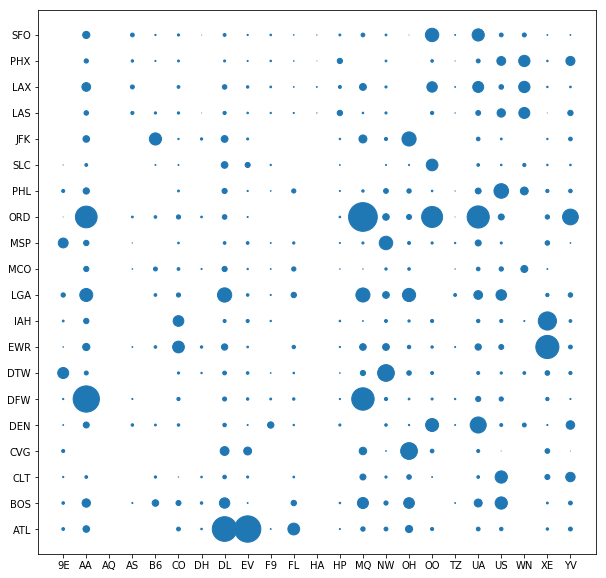

In [163]:
# plot
plt.scatter(data=carrier_airport_twenty, x='UniqueCarrier', y='Origin', s=carrier_airport_twenty['Cancelled']/20)

This quickly shows that there are some risky airport/carrier combinations. For instance, you may want to avoid flying American Airlines (AA) out of Dallas (DFW), while Delta (DL) out of Boston (BOS) is safe (this is my preferred routine!)

In [183]:
origin_order_20

Index(['ATL', 'ORD', 'DFW', 'LAX', 'DEN', 'IAH', 'PHX', 'LAS', 'EWR', 'DTW',
       'SLC', 'MSP', 'SFO', 'CVG', 'BOS', 'MCO', 'LGA', 'CLT', 'JFK', 'PHL'],
      dtype='object')

In [185]:
twenty_carriers = ['ATL', 'ORD', 'DFW', 'LAX', 'DEN', 'IAH', 'PHX', 'LAS', 'EWR', 'DTW',
       'SLC', 'MSP', 'SFO', 'CVG', 'BOS', 'MCO', 'LGA', 'CLT', 'JFK', 'PHL']

## Look into Boston
Boston is my home airport. I am curious to explore it on its own.

In [188]:
# Create dataframe filtered on Boston
boston_df = df_merge[df_merge['Origin'] == 'BOS']

### Is there a relationship between airtime and arrival delay?

/Users/Matt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Arrival Delay')

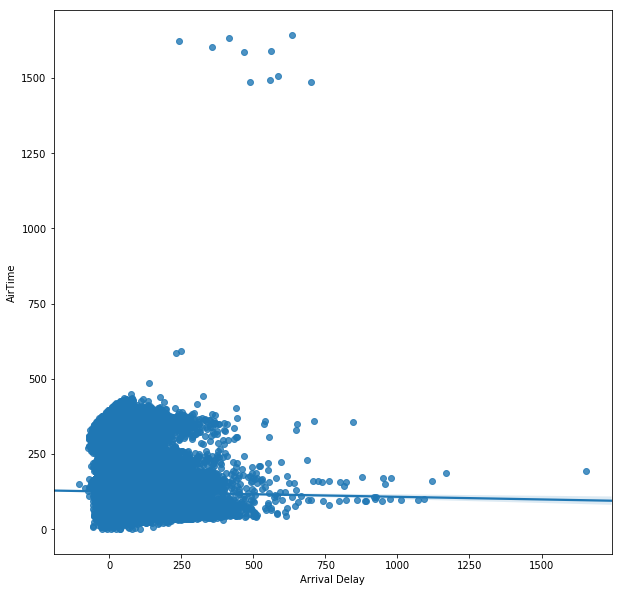

In [194]:
sb.regplot(data=boston_df, x='ArrDelay', y='AirTime')
plt.xlabel('Arrival Delay')

There does not appear to be any coorelation between airtime and arrival delay. This is surprising, as I assumed that the longer the flight the more likely a delay would be. 

### Is there seasonality to flying?

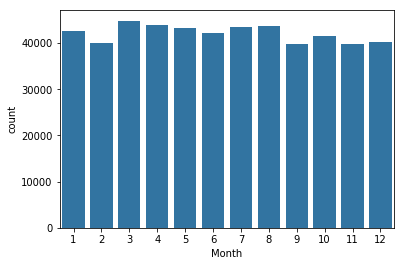

In [203]:
plt.figure(figsize=(6, 4))
sb.countplot(data=boston_df, x='Month', color=base_color)

The peak month is March, which is a bit surprising. I figured it would be in the summer when people are traveling for vacation. The slowr months come between September and December.

### Which is the busiest airline that flies out of Boston?

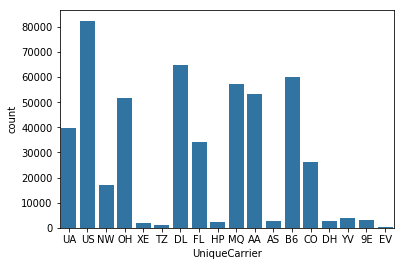

In [209]:
plt.figure(figsize=(6, 4))
sb.countplot(data=boston_df, x='UniqueCarrier', color=base_color)

This is too hard to sort, so let's order the results in descending order.

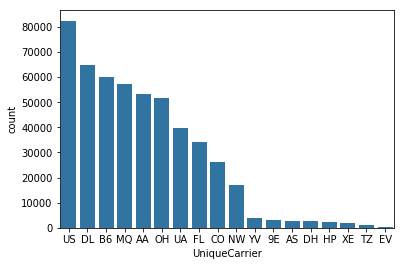

In [210]:
plt.figure(figsize=(6, 4))
sb.countplot(data=boston_df, x='UniqueCarrier', color=base_color, order=boston_df.UniqueCarrier.value_counts().index)

Ah! This is much better. I am quite surprised that US Airways has by far the most flights followed by my preferred Delta.

### Let's look at cancellations.
* Are they seasonal?
* And what types of cancellations are most prominent?
* Which airline is the worst? 

In [216]:
# Create a dataframe that captures cancellations by month for Boston
boston_cancel = boston_df.groupby(['Month']).Cancelled.sum()

In [217]:
boston_cancel = boston_cancel.reset_index(name='Cancelled')

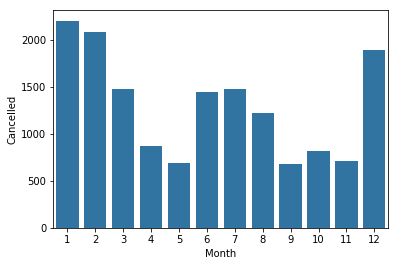

In [220]:
plt.figure(figsize=(6, 4))
sb.barplot(data=boston_cancel, x='Month', y='Cancelled', color=base_color)

No surprise here. Winter causes lots of problems for Logan Airport. December through February are tough months! But let's see if these cancellations are actually caused by weather as I assume.

In [235]:
# Create dataframe that captures month, cancellation code, and number of cancellations for Boston
boston_cancel_type = boston_df.groupby(['Month', 'CancellationCode']).size()
boston_cancel_type = boston_cancel_type.reset_index(name='count')

In [238]:
boston_cancel_type.head()

,Month,CancellationCode,count
0,1,A,716
1,1,B,1248
2,1,C,243
3,2,A,526
4,2,B,1381


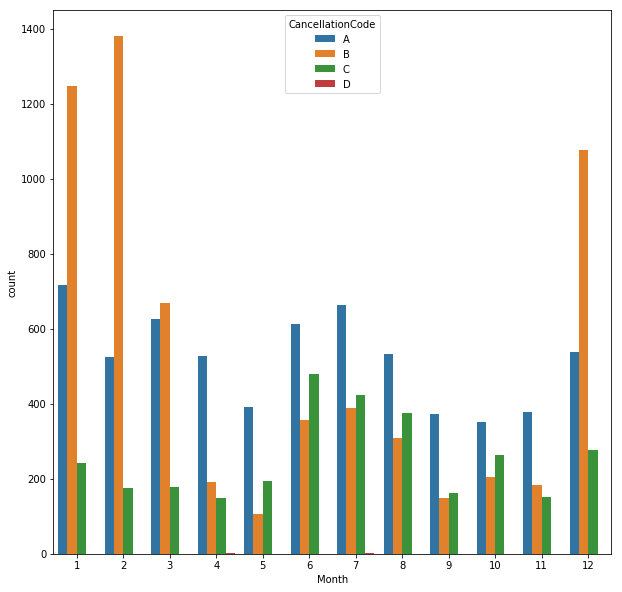

In [237]:
sb.barplot(data=boston_cancel_type, x='Month', y='count', hue='CancellationCode')

As suspected, weather accounts for the cancellations during the winter.

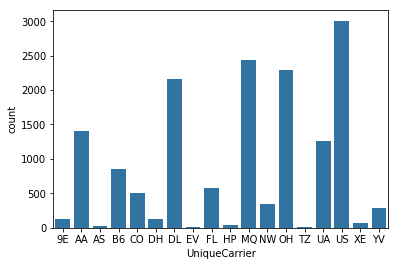

In [255]:
plt.figure(figsize=(6, 4))

boston_airline_cancel = boston_df.groupby('UniqueCarrier').Cancelled.sum().reset_index(name='count')

sb.barplot(data=boston_airline_cancel, x='UniqueCarrier', y='count', color=base_color)

US Airways has the most number of cancellations. Delta, despite having the second most flights, has the 4th most cancellations.